In [13]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from scipy import special

from mpl_toolkits import mplot3d

newtons:
8
x = 1.8703622328012195
y = 1.8703622328012195
z = 1.8703622328012195


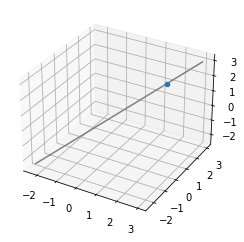

In [27]:
def NewtonSystem(f, g, h, J, x0, y0, z0, max, tol):
    X0 = np.array([[x0], [y0],[z0]])
    X1 = np.array([[0], [0],[0]])
    for i in range(0, max):
        X1 = X0 - np.linalg.inv(J(X0[0][0], X0[1][0],X0[2][0])) @ np.array([[f(X0[0][0], X0[1][0],X0[2][0])], [g(X0[0][0], X0[1][0],X0[2][0])],[h(X0[0][0], X0[1][0],X0[2][0])]])
        if abs(X0[0][0] - X1[0][0])/abs(X1[0][0]) < tol and abs(X0[1][0] - X1[1][0])/abs(X1[1][0]) < tol and abs(X0[2][0] - X1[2][0])/abs(X1[2][0]) < tol:
            print(i)
            return X1
        X0 = X1
    raise ValueError('not enought iterations')
def ffun(x,y,z):
    return  x - np.log(10-y*x)

def gfun(x,y,z):
    return y - np.log(10-z*y)

def hfun(x,y,z):
    return z - np.log(10-z*x)

def J(x,y,z):
    return np.array([[1-(1/(1-y*x))*(y),0,-(1/(1-z*x))*z], [-(1/(1-y*x))*x,1-(1/(1-z*y))*x,0],[0,-(1/(1-z*y))*y,1-(1/(1-z*x))*x]])

print('newtons:')
answer = NewtonSystem(ffun, gfun, hfun,J, 3,3,3, 100000, 1e-3)
print('x =', answer[0][0])
print('y =', answer[1][0])
print('z =', answer[2][0])

ax = plt.axes(projection = '3d')

dim = np.linspace(0,3,1000)

xline = ffun(dim,dim,dim)
yline = ffun(dim,dim,dim)
zline = ffun(dim,dim,dim)
ax.scatter3D(answer[0][0],answer[1][0],answer[2][0])
ax.plot3D(xline,yline,zline,'grey')
